In [ ]:
import glob, cv2, os, shutil
from shutil import copyfile
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
keras.__version__

'2.15.0'

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Danaus_Plexippus/001_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Danaus Plexippus')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Image Classification butterfly/data/train/Danaus_Plexippus/001_0003.jpg'

In [ ]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

In [ ]:
x2.shape

In [ ]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Heliconius_Charitonius/002_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Charitonius')
plt.show()

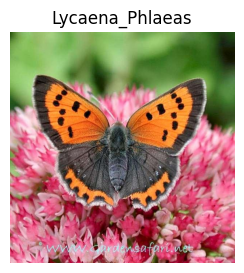

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Lycaena_Phlaeas/005_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Lycaena_Phlaeas')
plt.show()

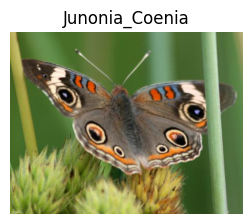

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Junonia_Coenia/004_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Junonia_Coenia')
plt.show()

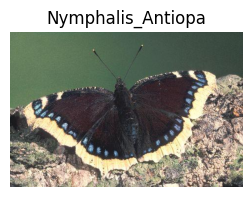

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Nymphalis_Antiopa/006_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Nymphalis_Antiopa')
plt.show()

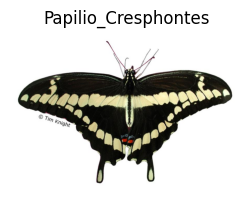

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Papilio_Cresphontes/007_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Papilio_Cresphontes')
plt.show()

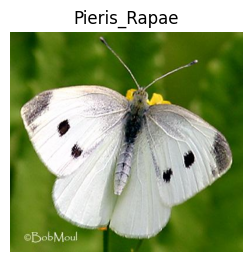

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Pieris_Rapae/008_0001.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Pieris_Rapae')
plt.show()

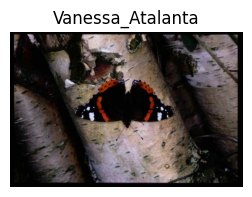

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Vanessa_Atalanta/009_0003.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa_Atalanta')
plt.show()

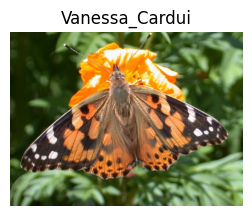

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Vanessa_Cardui/010_0002.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa_Cardui')
plt.show()

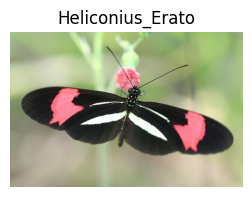

In [ ]:
img = load_img('/content/drive/MyDrive/Image Classification butterfly/data/train/Heliconius_Erato/003_0002.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius_Erato')
plt.show()

In [ ]:
# default settings
img_width, img_height = 224, 224

train_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train'
validate_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/validation/validate'
test_dir='/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/test'
nb_epochs = 20
batch_size = 32
nb_classes = 10

In [ ]:
def count_images(directory):
    total_images = 0
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            class_images = len(glob.glob(os.path.join(class_path, '*.jpg')))  # Assuming images have .jpg extension
            total_images += class_images
    return total_images

Training images

In [ ]:
nb_train_samples=592
nb_train_samples

592

In [ ]:
nb_validate_samples=169
nb_validate_samples

169

In [ ]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 592 images belonging to 10 classes.


In [ ]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 169 images belonging to 10 classes.


In [ ]:
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation = 'softmax')(x)
model = Model(inputs = vgg16_model.input, outputs = predictions)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    epochs=nb_epochs,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validate_generator,
    validation_steps=nb_validate_samples // batch_size
)
print('Training time: %s' % (now() - t))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-58-b1de38505234>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)


Test Score: 0.35592079162597656
Test Accuracy: 0.8698225021362305


In [ ]:
model.save('butterflies_vgg16_model_tl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


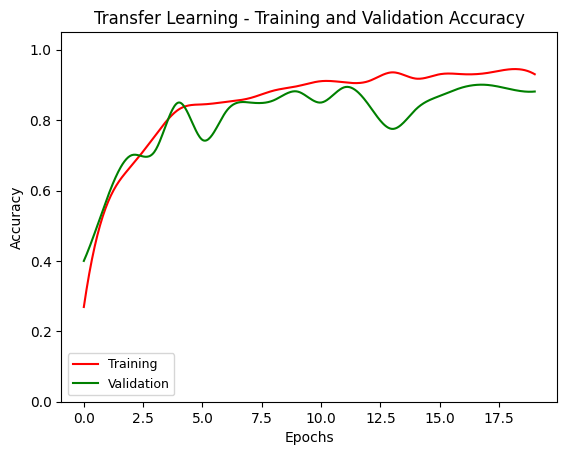

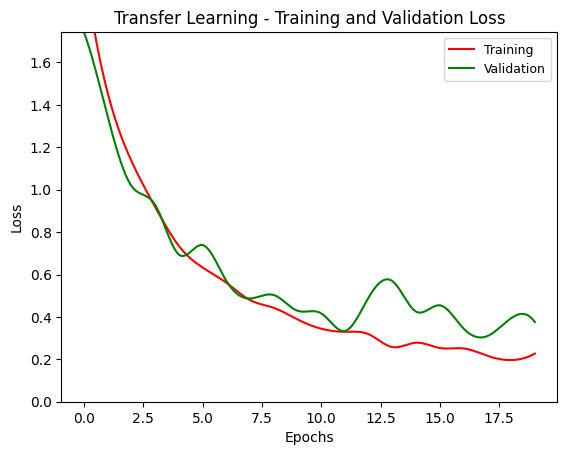

In [ ]:
from scipy.interpolate import interp1d

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.legend(loc='lower left', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = interp1d(x, y, kind='cubic')(x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label='Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = interp1d(x1, y1, kind='cubic')(x1_smooth)
plt.plot(x1_smooth, y1_smooth, 'g-', label='Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.legend(loc='upper right', fontsize=9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(y1))
plt.show()


In [ ]:
validate_generator.total_batches_seen

135

In [ ]:
directory = "/content/drive/MyDrive/Image Classification butterfly/data/test/butterflies_test"

# Define the pattern to match image files (e.g., JPG or PNG)
pattern = directory + "/*.jpg"  # Adjust the extension as per your image file format

# Use glob to find all files matching the pattern and count them
num_images = len(glob.glob(pattern))
num_images

71

In [ ]:
predict_files=glob.glob(pattern)

In [ ]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [ ]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

1/1 [==============================] - 0s 18ms/step


In [ ]:
final = pd.DataFrame()
final["id"] = image_id
final["Butterfly"] = predictor
final.head(num_images)

id  Butterfly
0   /content/drive/MyDrive/Image Classification bu...          0
1   /content/drive/MyDrive/Image Classification bu...          6
2   /content/drive/MyDrive/Image Classification bu...          8
3   /content/drive/MyDrive/Image Classification bu...          4
4   /content/drive/MyDrive/Image Classification bu...          6
..                                                ...        ...
66  /content/drive/MyDrive/Image Classification bu...          3
67  /content/drive/MyDrive/Image Classification bu...          2
68  /content/drive/MyDrive/Image Classification bu...          0
69  /content/drive/MyDrive/Image Classification bu...          1
70  /content/drive/MyDrive/Image Classification bu...          9

[71 rows x 2 columns]

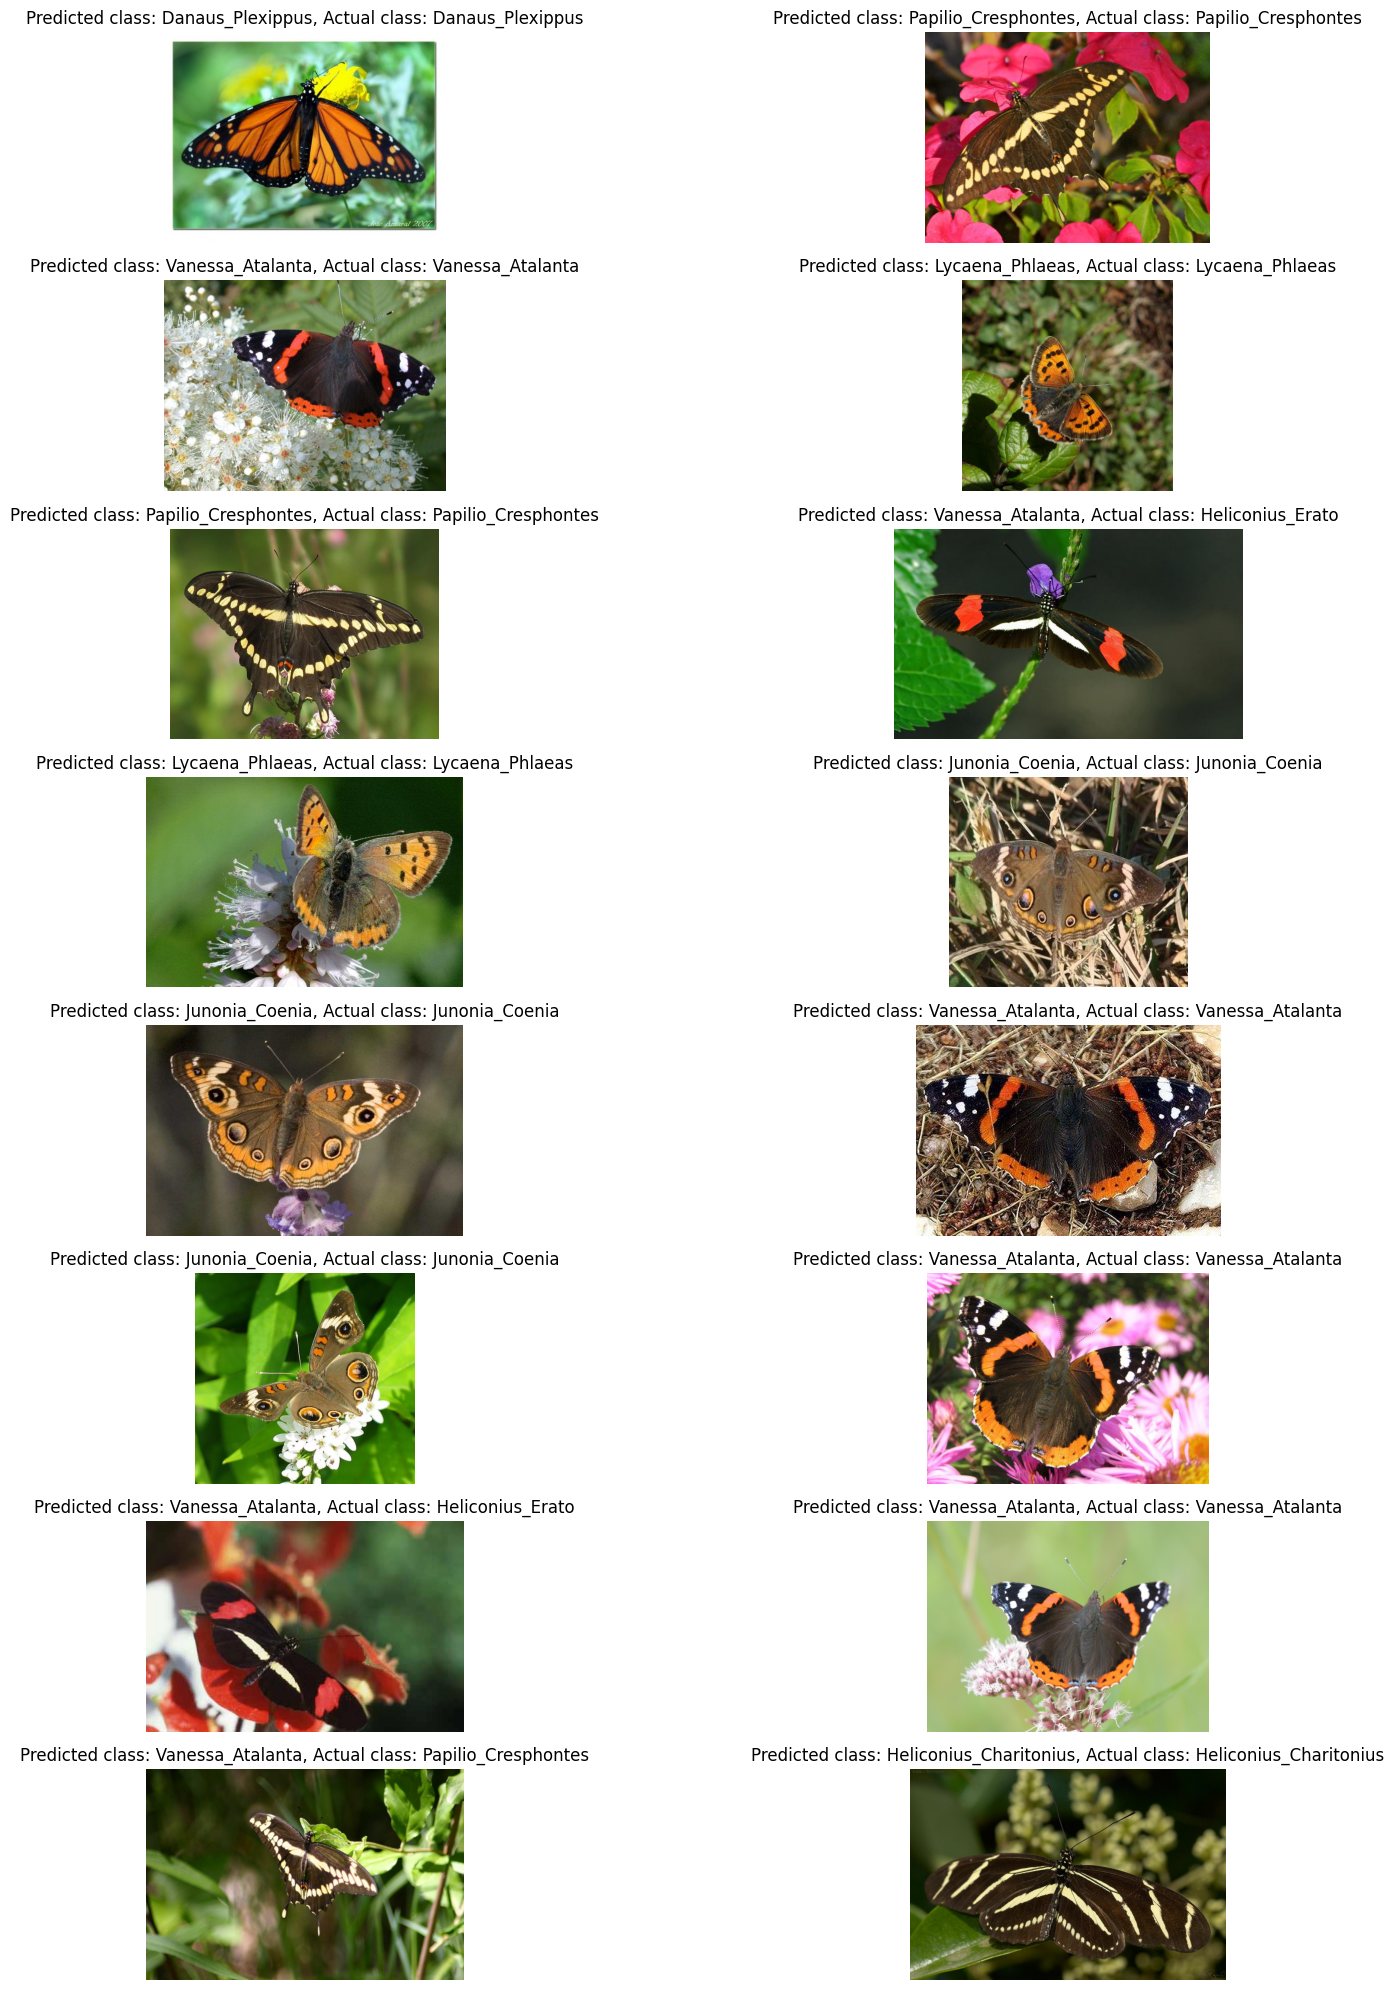

In [ ]:
import os

# Define the class names based on the order of folders in train_dir
class_names = sorted(os.listdir('/content/drive/MyDrive/Image Classification butterfly/data/train'))

# Extract only the name of the image (without the full path)
image_names = [os.path.basename(file) for file in predict_files]

# Define a function to visualize images
def visualize_images(files, labels, actual_labels, num_images=16):
    fig, axes = plt.subplots(8, 2, figsize=(20, 20))
    for i, ax in enumerate(axes.flatten()):
        # Load and display image
        image = cv2.imread(files[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')

        # Set title with predicted and actual labels
        predicted_index = labels[i]
        predicted_class = class_names[predicted_index]
        actual_class = "_".join(os.path.basename(image_id[i]).split('_')[:2])
        ax.set_title(f"Predicted class: {predicted_class}, Actual class: {actual_class}")

        if i == num_images - 1:
            break
    plt.tight_layout()
    plt.show()

# Visualize 20 images along with their predicted and actual labels
visualize_images(predict_files, predictor, image_id, num_images=32)


In [ ]:
import contextlib
def predict_and_visualize_single_image(image_path, model, class_names):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256)).astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)

    # Predict the image using the model
    with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
        prediction = model.predict(image)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    probability = prediction[0][predicted_index]

    # Visualize the image with the predicted class name and probability
    plt.imshow(image[0])
    plt.title(f"Predicted class: {predicted_class}\nProbability: {probability:.4f}\n")
    plt.axis('off')
    plt.show()

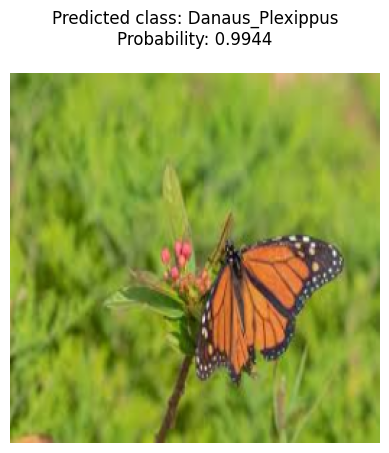

In [ ]:
predict_and_visualize_single_image("/content/images.jpg",model,class_names)

In [ ]:
from tensorflow.keras.models import load_model
# Assuming your trained model is saved as 'my_model.h5'
model = load_model('/content/butterflies_vgg16_model_tl.h5')

In [ ]:
model.layers

In [ ]:
# Step 1 - Set up fine tuning on pre-trained ImageNet vgg16 model - train all lower 94 layers
for layer in model.layers:
    layer.trainable = True

# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(learning_rate = 0.0001, momentum=0.9),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    epochs = nb_epochs,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = validate_generator,
    validation_steps = nb_validate_samples//batch_size)
print('Training time: %s' % (now() - t))

<ipython-input-73-480a7f2238f2>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fine_tuning_history = model.fit_generator(


Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9857

18/18 [==============================] - 25s 1s/step - loss: 0.0688 - accuracy: 0.9857 - val_loss: 0.1854 - val_accuracy: 0.9527
Epoch 2/20
18/18 [==============================] - 13s 702ms/step - loss: 0.0666 - accuracy: 0.9857
Epoch 3/20
18/18 [==============================] - 13s 732ms/step - loss: 0.0412 - accuracy: 0.9893
Epoch 4/20
18/18 [==============================] - 14s 757ms/step - loss: 0.0482 - accuracy: 0.9857
Epoch 5/20
18/18 [==============================] - 16s 854ms/step - loss: 0.0470 - accuracy: 0.9875
Epoch 6/20
18/18 [==============================] - 14s 772ms/step - loss: 0.0374 - accuracy: 0.9893
Epoch 7/20
18/18 [==============================] - 13s 725ms/step - loss: 0.0292 - accuracy: 0.9929
Epoch 8/20
18/18 [==============================] - 13s 716ms/step - loss: 0.0253 - accuracy: 0.9929
Epoch 9/20
18/18 [==============================] - 13s 711ms/step - loss: 0.0136 - accuracy: 0.9982
Epoch 10/20
18/18 [==============================] - 13s 731ms/

In [ ]:
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

<ipython-input-75-cdd2db689a76>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)


Test Score: 0.12230154126882553
Test Accuracy: 0.9585798978805542


In [ ]:
model.save('finetuned_butterflies_vgg16_model_ft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
validate_generator.total_batches_seen

27

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/test/butterflies_test'

# Define the pattern to match image files (e.g., JPG or PNG)
pattern = directory + "/*.jpg"  # Adjust the extension as per your image file format

# Use glob to find all files matching the pattern and count them
num_images = len(glob.glob(pattern))
num_images

71

In [ ]:
predict_files=glob.glob(pattern)

In [ ]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [ ]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

1/1 [==============================] - 0s 18ms/step


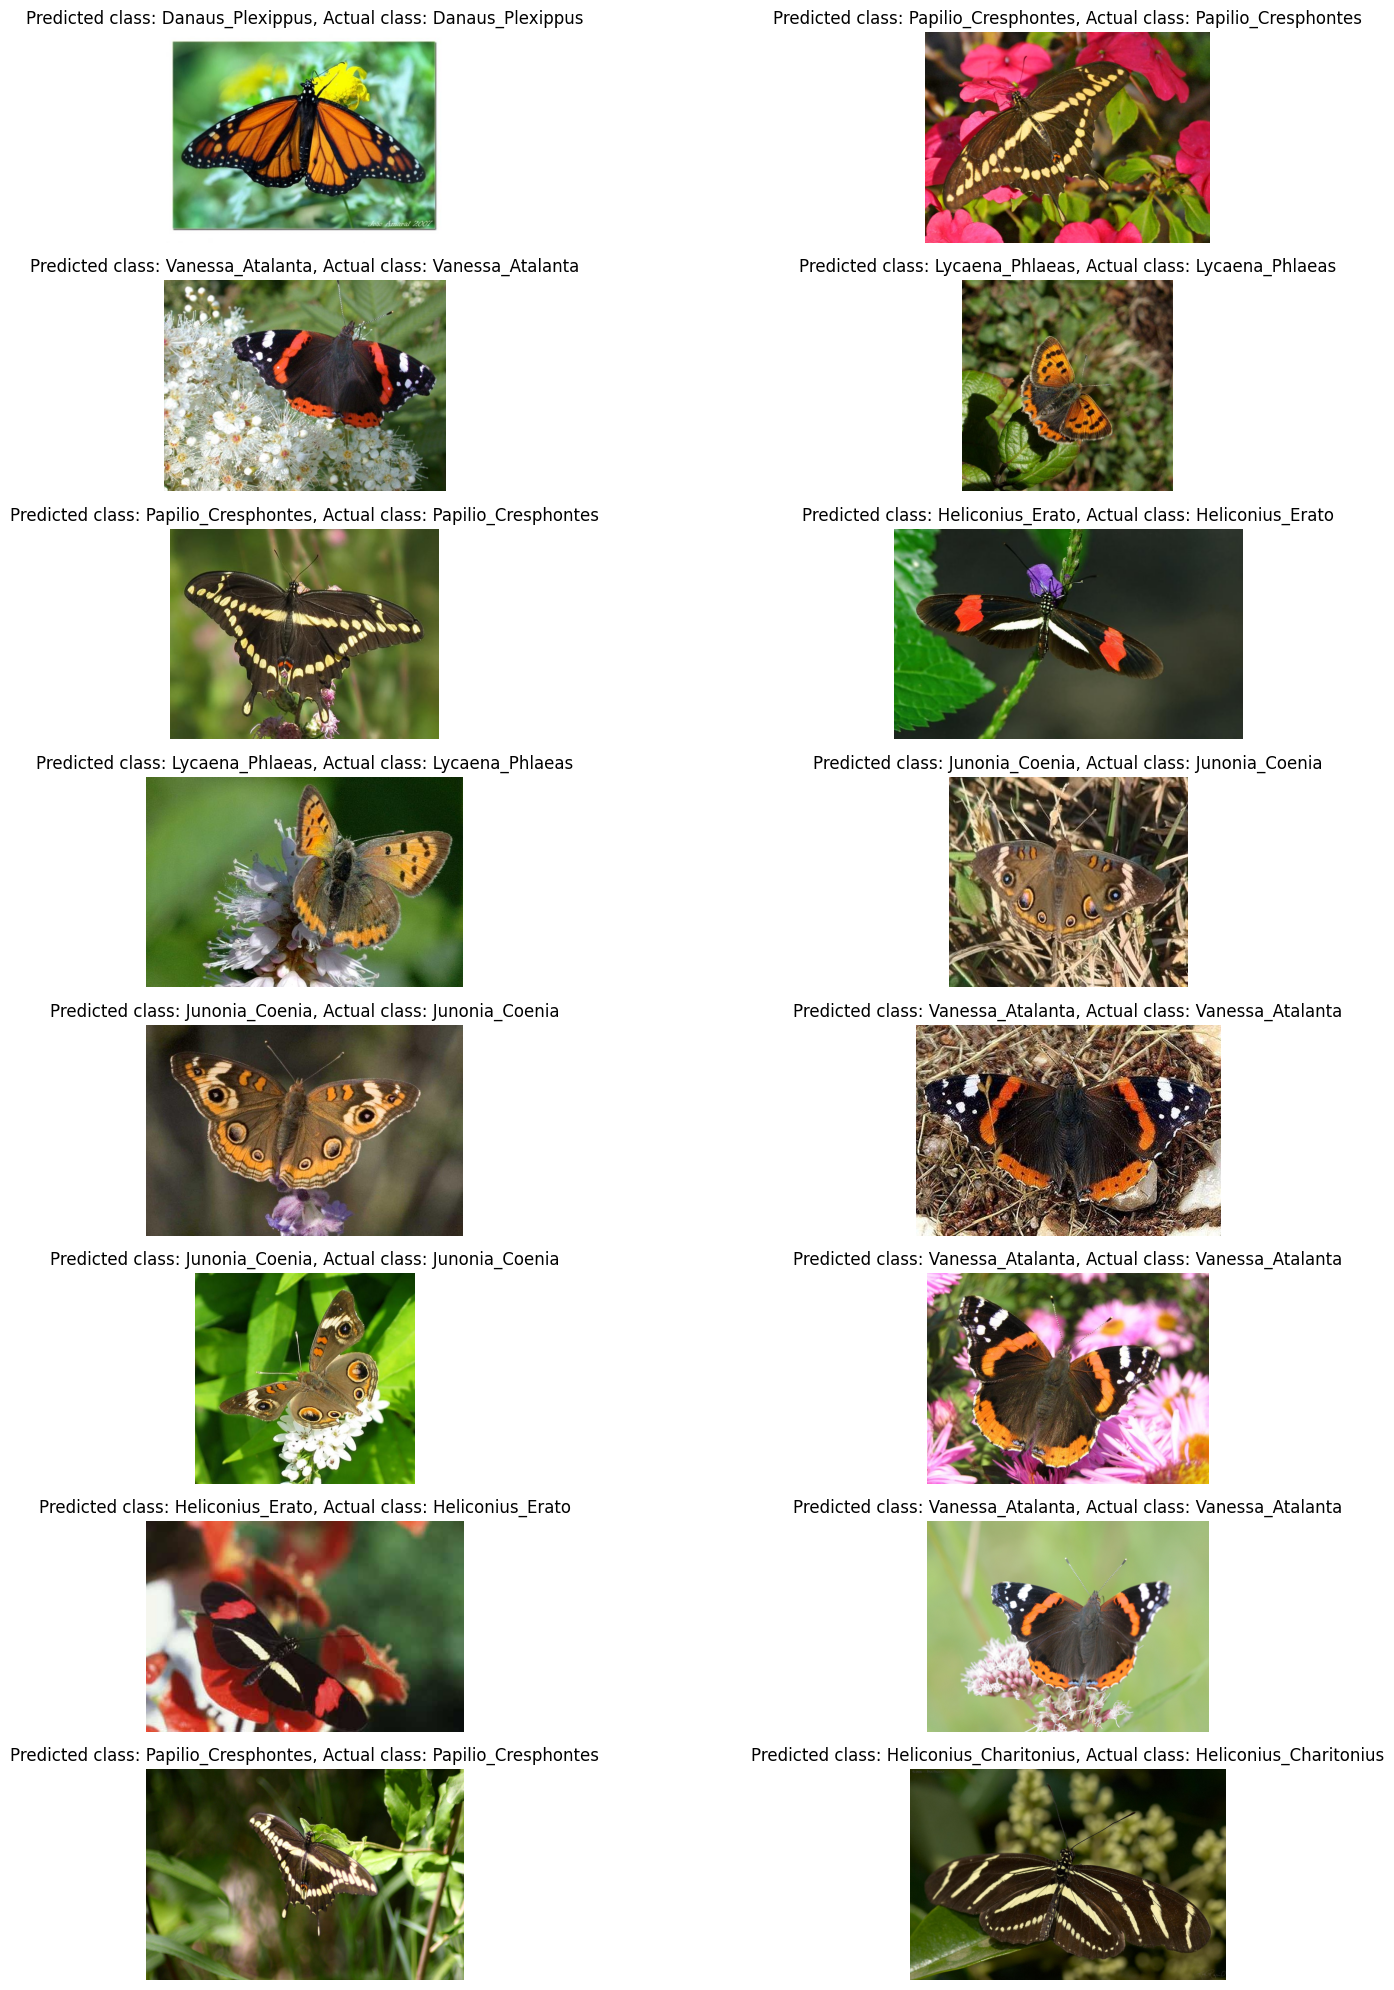

In [ ]:
import os

# Define the class names based on the order of folders in train_dir
class_names = sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/Image Classification butterfly/data/train'))

# Extract only the name of the image (without the full path)
image_names = [os.path.basename(file) for file in predict_files]

# Define a function to visualize images
def visualize_images(files, labels, actual_labels, num_images=16):
    fig, axes = plt.subplots(8, 2, figsize=(20, 20))
    for i, ax in enumerate(axes.flatten()):
        # Load and display image
        image = cv2.imread(files[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.axis('off')

        # Set title with predicted and actual labels
        predicted_index = labels[i]
        predicted_class = class_names[predicted_index]
        actual_class = "_".join(os.path.basename(image_id[i]).split('_')[:2])
        ax.set_title(f"Predicted class: {predicted_class}, Actual class: {actual_class}")

        if i == num_images - 1:
            break
    plt.tight_layout()
    plt.show()

# Visualize 20 images along with their predicted and actual labels
visualize_images(predict_files, predictor, image_id, num_images=32)


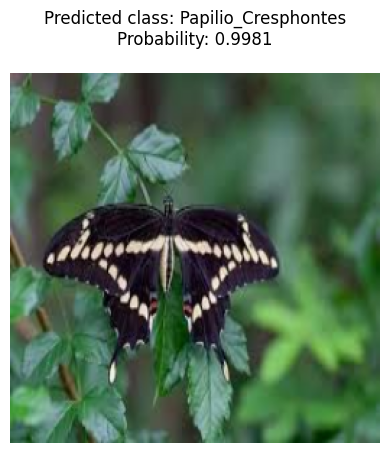

In [ ]:
predict_and_visualize_single_image("/content/.jpg",model,class_names)